In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\andre\\OneDrive\\Desktop\\cognify_internship\\cognify.csv")

# LEVEL 3 -  Restaurant Reviews

## TASK 1 

# a - Analyze the text reviews to identify the most common positive and negative keywords.

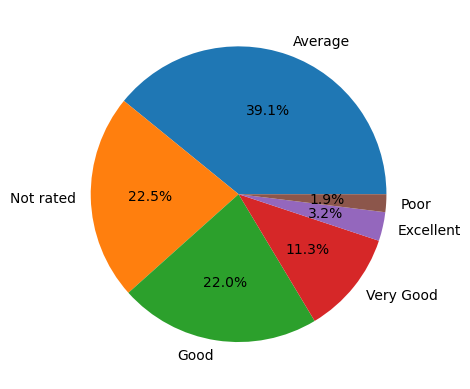

In [3]:
review_data = df["Rating text"].value_counts()
plt.pie(review_data.values,labels =review_data.index,autopct ="%1.1f%%" )
plt.show()

In [5]:
review_data

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

###### - the most common positive review EXCELLENT  - 301 COUNT
###### - the most common negative review POOR - 186 COUNT

# 

#  b - Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [6]:
reviews = df["Rating text"]
total_reviews = len(reviews)
total_reviews_length = 0

In [7]:
for review in reviews:
    total_reviews_length += len(review.split())
    
avg_review_length = total_reviews_length / total_reviews
print("average length of rating:",round(avg_review_length,2))

average length of rating: 1.34


In [8]:
review_len_vs_rating ={}

for rating in df["Aggregate rating"].unique():
    filttered_reviews = df.loc[df["Aggregate rating"] == rating]["Rating text"]
    total_length = 0
    total_reviews = len(filttered_reviews)
    
    for review in filttered_reviews:
        total_length += len(review.split())
        
        
    average_length = total_length / total_reviews
    review_len_vs_rating[rating] = average_length
        
print("review_len_vs_rating")
print(review_len_vs_rating)

review_len_vs_rating
{4.8: 1.0, 4.5: 1.0, 4.4: 2.0, 4.9: 1.0, 4.0: 2.0, 4.2: 2.0, 4.3: 2.0, 3.6: 1.0, 4.7: 1.0, 3.0: 1.0, 3.8: 1.0, 3.7: 1.0, 3.2: 1.0, 3.1: 1.0, 0.0: 2.0, 4.1: 2.0, 3.3: 1.0, 4.6: 1.0, 3.9: 1.0, 3.4: 1.0, 3.5: 1.0, 2.2: 1.0, 2.9: 1.0, 2.4: 1.0, 2.6: 1.0, 2.8: 1.0, 2.1: 1.0, 2.7: 1.0, 2.5: 1.0, 1.8: 1.0, 2.0: 1.0, 2.3: 1.0, 1.9: 1.0}


In [9]:
review_len_vs_rating = pd.DataFrame({
    "ratings": list(review_len_vs_rating.keys()),
    "avg_review_len": list(review_len_vs_rating.values())
})

In [10]:
review_len_vs_rating

,ratings,avg_review_len
0,4.8,1.0
1,4.5,1.0
2,4.4,2.0
3,4.9,1.0
4,4.0,2.0
5,4.2,2.0
6,4.3,2.0
7,3.6,1.0
8,4.7,1.0
9,3.0,1.0


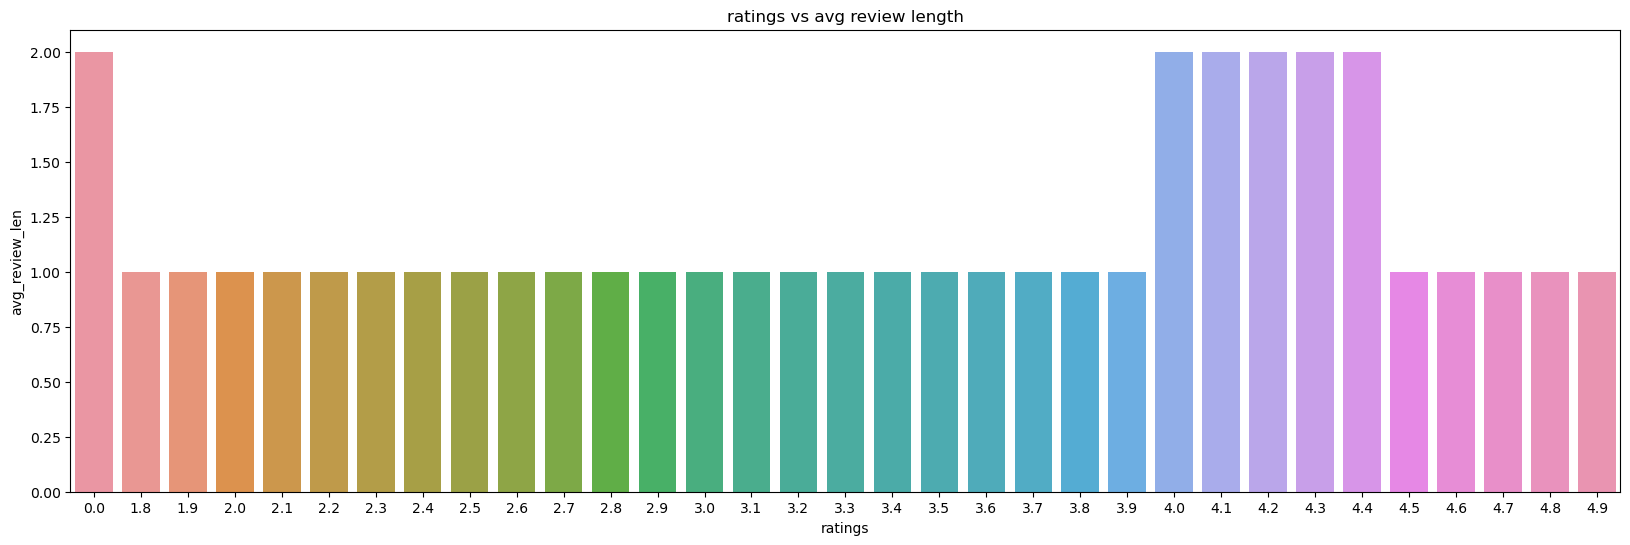

In [11]:
plt.figure(figsize =(20,6))
sns.barplot(x ="ratings",y = "avg_review_len",data = review_len_vs_rating )
plt.title("ratings vs avg review length")
plt.show()

# 

# Task 2: Votes Analysis


# a - Identify the restaurants with the highest and lowest number of votes.


In [12]:
resturant_votes = df.groupby("Restaurant Name")["Votes"].sum()
resturant_votes.sort_values(ascending =False)

Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Farzi Cafe                   10098
                             ...  
Muncheezz                        0
Swiss Gourmessa                  0
Dosa and Pizza Corner            0
Sweets n Treats                  0
Food Station                     0
Name: Votes, Length: 7446, dtype: int64

In [13]:
high_votes = resturant_votes.max()
high_resname =  resturant_votes.idxmax()
lowest_votes = resturant_votes.min()
lowest_resname =  resturant_votes.idxmin()

In [14]:
res = pd.DataFrame({"resturant":[high_resname,lowest_resname],"votes":[high_votes,lowest_votes]})
res

,resturant,votes
0,Barbeque Nation,28142
1,#hashtag,0


In [16]:
print( "the",high_resname,"has the highest vote of : ",high_votes)
print( "the",lowest_resname,"has the lowest vote of :",lowest_votes)

the Barbeque Nation has the highest vote of :  28142
the #hashtag has the lowest vote of : 0


# 

# b - Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [17]:
corr_col = df[["Votes","Aggregate rating"]]
corr_matrix = corr_col.corr()
corr_matrix

,Votes,Aggregate rating
Votes,1.000000,0.313691
Aggregate rating,0.313691,1.000000


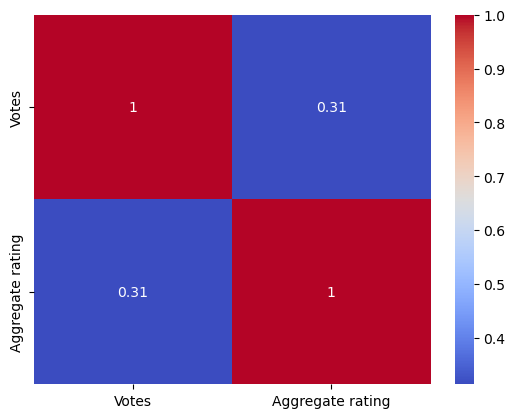

In [18]:
sns.heatmap(corr_matrix,annot= True,cmap="coolwarm")
plt.show()

# 

# Task 3: Price Range vs. Online Delivery and Table Booking

# a - Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [19]:
price_onlined = df.groupby("Price range")["Has Online delivery"].value_counts(normalize = True).unstack().fillna(0)
price_table = df.groupby("Price range")["Has Table booking"].value_counts(normalize = True).unstack().fillna(0)

In [20]:
print("relation between price range and Has Online delivery")
print()
print(price_onlined)

relation between price range and Has Online delivery

Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444


In [21]:
print("relation between price range and has table booking")
print()
print(price_table)

relation between price range and has table booking

Has Table booking        No       Yes
Price range                          
1                  0.999775  0.000225
2                  0.923225  0.076775
3                  0.542614  0.457386
4                  0.532423  0.467577


# 

# b - Determine if higher-priced restaurants are more likely to offer these services.

In [22]:
max_rang = df["Price range"].max()
high_price_restaurant = df[df["Price range"] == max_rang]

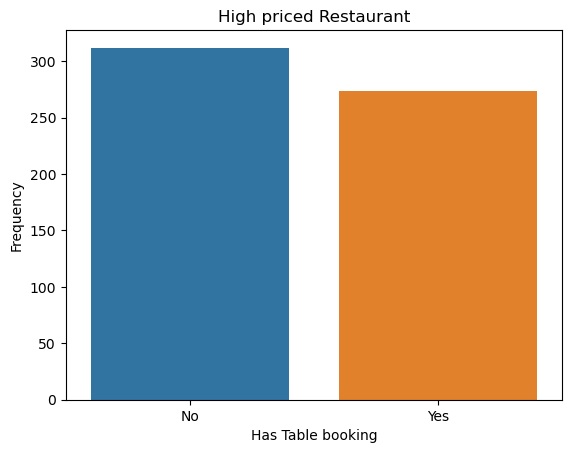

In [23]:
res_offer_table = high_price_restaurant["Has Table booking"].value_counts()
sns.barplot(res_offer_table.index,res_offer_table)
plt.xlabel("Has Table booking")
plt.ylabel("Frequency")
plt.title("High priced Restaurant")
plt.show()

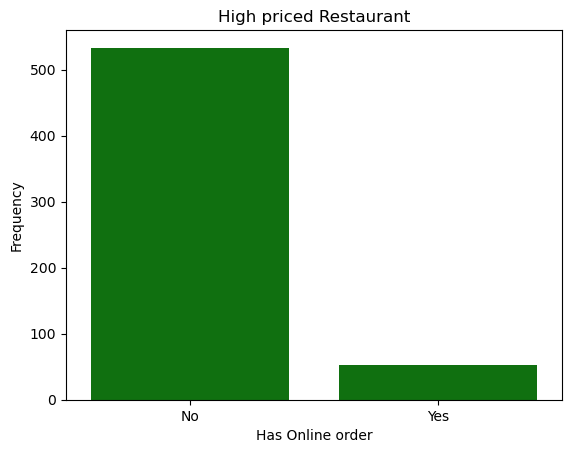

In [24]:
res_offer_online = high_price_restaurant["Has Online delivery"].value_counts()
sns.barplot(res_offer_online.index,res_offer_online,color = "green")
plt.xlabel("Has Online order")
plt.ylabel("Frequency")
plt.title("High priced Restaurant")
plt.show()

### the higher price restaurant are highly offering table booking 